# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цели исследования**

В ходе исследования нам нужно определить:

- Изучить параметры квартир - площадь, цена, число комнат, высота потолков
- Изучить время продажи квартиры
- Определить параметры влияющие на стоимость квартиры
- Определить населеные пункты с самой выской и самой низкой ценой
- Определить населеные пункты с самым большим количеством объявлений
- Определить влияние цены на расположение от центра Санкт-Петербурга
- Определить сегмент квартир в центре Санкт-Перербурга и изучить параметры этого сегмента

**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откроем файл с данными и изучи общую информацию. 

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd

In [2]:
# прочитаем файл
data = pd.read_csv('/Users/nikit/Downloads/real_estate_data.csv', sep='\t')

In [3]:
# для отображения всех столбцов 
pd.set_option('display.max_columns', None)

In [4]:
# выведем общую информацию о датафрейме
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# посмотрим первые 10 строк датафрейма
data.head(10)  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


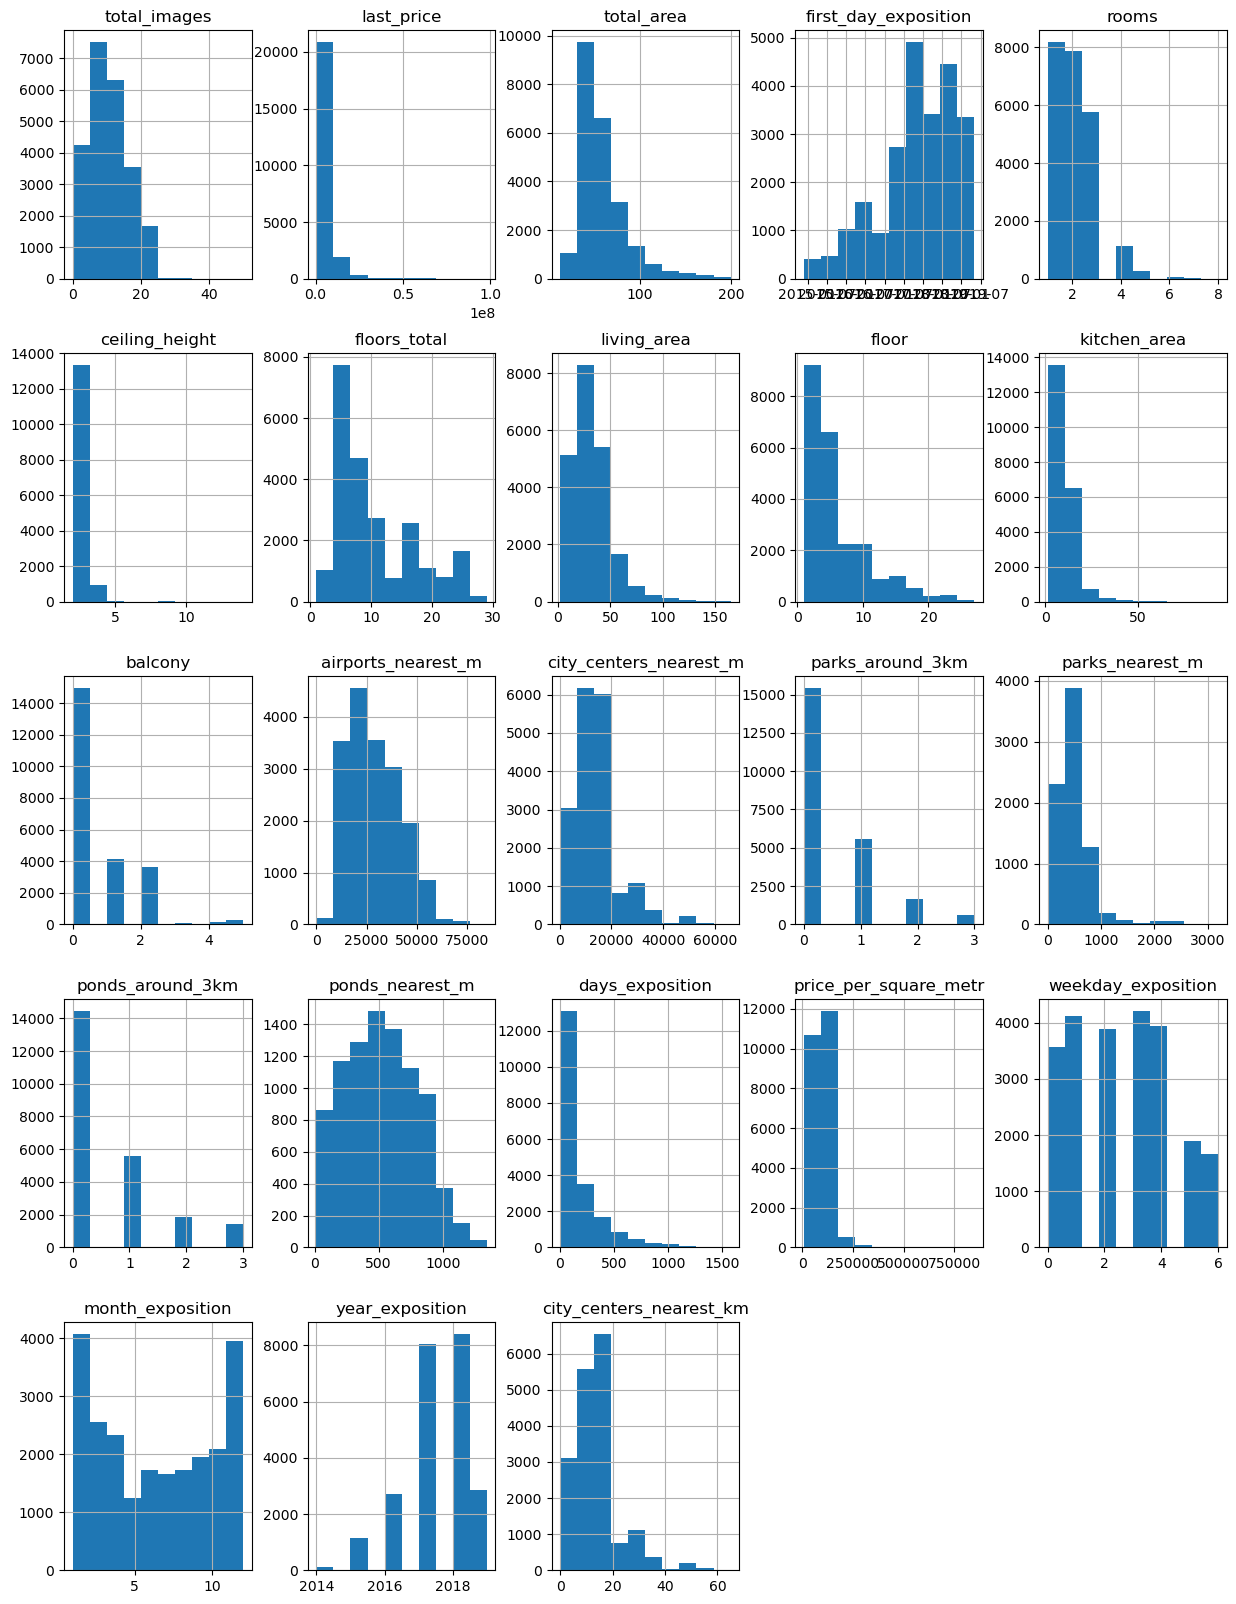

In [92]:
# построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15,20))
plt.show()

<font color='green'>**Вывод:**</font>

**Изучение данных:**

В датафрейме всего 23699 строк и 22 столбца. Посмотрим в каких столбцах есть пропуски:'ceiling_height' - всего 14504 строки, 'floors_total' - 23613, 'living_area' - 21796, **'is_apartment' - 2775 (самый незаполненный столбец)**, 'kitchen_area' - 21421, 'balcony' - 12180, 'locality_name' - 23650, 'airports_nearest' - 18157, 'cityCenters_nearest' - 18180, 'parks_around3000' - 18181, 'parks_nearest' - 8079, 'ponds_around3000' - 18181, 'ponds_nearest' - 9110, 'days_exposition' - 20518. Наименование столбцов приведены в змеином_регистре, кроме столбца cityCenters_nearest, его можно подправить.


**Тип столбцов:**

столбец 'first_day_exposition' имет тип object, изменим на datetime64, "floors_total" имеет тип float64, так как не может быть полэтажа, изменим на тип int64, "is_apartment" имеет тип object, изменим на bool, "balcony" имеет тип float64, так как не может быть пол балкона, изменим на int64, "parks_around3000" имеет тип float64, так как не может быть пол парка, изменим на int64, "ponds_around3000" имеет тип float64, так как не может быть пол водоема, изменим на int64, "days_exposition" имеет тип float64, изменим на int64

### Предобработка данных

In [7]:
# Переименуем название столбцов
data = data.rename(columns = {'airports_nearest': 'airports_nearest_m',
                              'cityCenters_nearest': 'city_centers_nearest_m',
                              'parks_around3000': 'parks_around_3km',
                              'parks_nearest': 'parks_nearest_m', 
                              'ponds_around3000': 'ponds_around_3km',
                              'ponds_nearest': 'ponds_nearest_m'
                             })
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest_m', 'city_centers_nearest_m',
       'parks_around_3km', 'parks_nearest_m', 'ponds_around_3km',
       'ponds_nearest_m', 'days_exposition'],
      dtype='object')

**2.1. Исследование и заполнение пропусков в данных**

In [8]:
# посчитаем долю пропусков в % от общего количества строк.
data.isna().mean().sort_values()*100

total_images               0.000000
open_plan                  0.000000
floor                      0.000000
rooms                      0.000000
studio                     0.000000
total_area                 0.000000
last_price                 0.000000
first_day_exposition       0.000000
locality_name              0.206760
floors_total               0.362885
living_area                8.029875
kitchen_area               9.612220
days_exposition           13.422507
ponds_around_3km          23.283683
parks_around_3km          23.283683
city_centers_nearest_m    23.287902
airports_nearest_m        23.384953
ceiling_height            38.799105
balcony                   48.605426
ponds_nearest_m           61.559559
parks_nearest_m           65.909954
is_apartment              88.290645
dtype: float64

Удалим незначительную долю информации с пропусками locality_name (0.206760),
выяснить населенный пункт нет возможности, пропуски в этажах floors_total (0.362885) оставим, они нам не мешают.

In [9]:
# удалим пропуски в столбце населенных пунктах
data = data.dropna(subset=['locality_name', 'floors_total'])

In [10]:
# посмотрим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            23565 non-null  int64  
 1   last_price              23565 non-null  float64
 2   total_area              23565 non-null  float64
 3   first_day_exposition    23565 non-null  object 
 4   rooms                   23565 non-null  int64  
 5   ceiling_height          14481 non-null  float64
 6   floors_total            23565 non-null  float64
 7   living_area             21700 non-null  float64
 8   floor                   23565 non-null  int64  
 9   is_apartment            2760 non-null   object 
 10  studio                  23565 non-null  bool   
 11  open_plan               23565 non-null  bool   
 12  kitchen_area            21343 non-null  float64
 13  balcony                 12090 non-null  float64
 14  locality_name           23565 non-null

**days_exposition**

In [11]:
# посмотрим пропуски в данных о днях публикации
data['days_exposition'].isna().sum()

3171

Возможно пропуски связаны с отсутствием информации о продаже – квартиру либо еще не продали, либо продали, но данные еще не актуализировали. Поэтому в этом столбце заполнять пропуски не будем.

**balcony**

In [12]:
# заменяем все пропуски в столбце количество балконов на значение "0" и заменим тип данных
data['balcony'] = data['balcony'].fillna(0).astype('int')

**is_apartment**

In [13]:
# столбец апартаменты видимо появился не вместе с началом ведения записей, все пропущенные значения заменим на False, 
# апартаменты появились относительно недавно
# заменим тип данных
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            23565 non-null  int64  
 1   last_price              23565 non-null  float64
 2   total_area              23565 non-null  float64
 3   first_day_exposition    23565 non-null  object 
 4   rooms                   23565 non-null  int64  
 5   ceiling_height          14481 non-null  float64
 6   floors_total            23565 non-null  float64
 7   living_area             21700 non-null  float64
 8   floor                   23565 non-null  int64  
 9   is_apartment            23565 non-null  bool   
 10  studio                  23565 non-null  bool   
 11  open_plan               23565 non-null  bool   
 12  kitchen_area            21343 non-null  float64
 13  balcony                 23565 non-null  int32  
 14  locality_name           23565 non-null

**airports_nearest_m, city_centers_nearest_m, parks_nearest_m, ponds_nearest_m**

In [14]:
# посмотрим пропуски в расстояние до аэропорта
data['airports_nearest_m'].isna().sum()

5524

In [15]:
# выводим первые и последние строки с пропусками
data[data['airports_nearest_m'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,False,False,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,False,False,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,False,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Вывод airports_nearest_m:**

В основном расстояние не указано из за отдаленности населенных пунктов, заполнить мы их не сможем, оставляем как есть.

**Вывод city_centers_nearest_m, parks_nearest_m, ponds_nearest_m:**

Наблюдает аналогичная ситуация с пропусками , из-за отдаленности населенных пунктов, заполнить мы их не сможем, оставляем как есть.

**parks_around_3km, ponds_around_3km**

In [16]:
# выводим строки с пропусками
data[data['parks_around_3km'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,False,False,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


В основном все пропуски связаны с локацией, заполним пропуски нулевыми значениями.

In [17]:
# заполняем пустые значения и заменим тип данных
data['parks_around_3km'] = data['parks_around_3km'].fillna(0).astype('int')

In [18]:
# считаем пропуски
data['parks_around_3km'].isna().sum()

0

In [19]:
# заполняем пустые значения и заменим тип данных
data['ponds_around_3km'] = data['ponds_around_3km'].fillna(0).astype('int')

In [20]:
# считаем пропуски
data['ponds_around_3km'].isna().sum()

0

<font color='green'>**Вывод:**</font>

Причины, которые могли привести к пропускам в исходных данных: человеческий фактор (например при внесении данных, могли случайно нажать пробел, скопировать лишние символы, удалить значения ячеек).
Также могут быть технические причины появления пропусков (например, неудачно написанный код, по которому происходила загрузка данных с сервера).
Также, например, пользователь не указал о себе какие-нибудь сведения или автоматизированная система сбора информации дала сбой. Иногда пропуски оставляют умышленно, рассчитывая на автозаполнение спецсимволами.
Также пользователи могут заполнить в анкетах не все данные.

**2.2. Изменение типов данных.**

In [21]:
# меняем тип данных с object в столбце `first_day_exposition` на datetime64[ns]
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'] , format='%Y-%m-%d')
display(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23565, dtype: datetime64[ns]

In [22]:
# меняем тип данных с float на int в столбце 'city_centers_nearest_m'
data['city_centers_nearest_m'] = data['city_centers_nearest_m'].astype('Int64')
display(data['city_centers_nearest_m'])

0        16028
1        18603
2        13933
3         6800
4         8098
         ...  
23694     4232
23695     <NA>
23696     <NA>
23697    10364
23698     <NA>
Name: city_centers_nearest_m, Length: 23565, dtype: Int64

In [23]:
# меняем тип данных с float на int в столбце 'last_price'
data['last_price'] = data['last_price'].astype('Int64')
display(data['last_price'])

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23565, dtype: Int64

In [24]:
# меняем тип данных с float на int в столбце 'floors_total'
data['floors_total'] = data['floors_total'].astype('Int64')
display(data['floors_total'])

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23565, dtype: Int64

<font color='green'>**Вывод:**</font>

Изменять тип данных необходимо, так как при дальнейшем исследовании может возникнуть необходимость выполнения каких-либо арифметических действий с различными ячейками. А в Pytnon есть определенные правила, при несоблюдении которых возникнут ошибки и код не будет выполняться. Любая операция со значением float дает результат того же типа.
Также следует отдельно проверять тип данных в столбцах с датой или временем. Нельзя будет выполнить исследовательские действия, если в столбце с форматом дата будет тип данных object, вместо datetime64[ns].

**2.3. Обработка явных дубликатов.**

In [25]:
# посчитаем явные дубликаты 
data.duplicated().sum()

0

**2.4. Обработка неявных дубликатов.**

In [26]:
# считаем количество строк-дубликатов в данных locality_name - название населенного пункта
data['locality_name'].duplicated().sum()

23201

In [27]:
# выведем уникальные значения по столбцу название населенного пункта
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [28]:
# меняем все населенные пункты с дубликатами
data['locality_name'] = data['locality_name'].replace({'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'})
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок 

In [29]:
# меняем посёлок на поселок (неявные дубликаты)
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

**2.5. Обработка и удаление аномалий(редких значений)**

(0.0, 35.0)

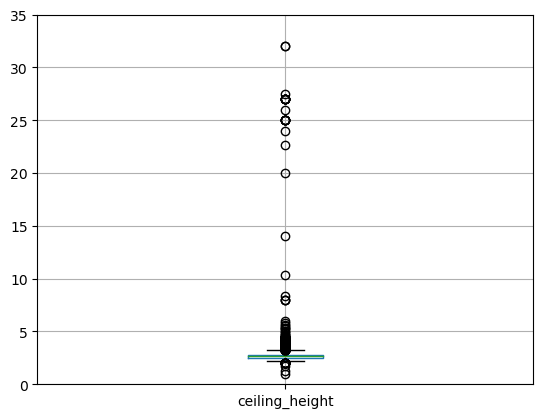

In [30]:
# построим ящик с усами
data.boxplot('ceiling_height')
plt.ylim(0, 35)

In [31]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10  if x>=20 else x)
print(data['ceiling_height'].min())
print(data['ceiling_height'].max())

1.0
14.0


Квартиры с высотой потолков 1 метр выглядят неправдоподобно. Оставим квартиры с высотой от 2 метров.

In [33]:
data = data.query('ceiling_height>=2.0 or ceiling_height.isna()')

In [35]:
# проверим
print(data['ceiling_height'].min())
print(data['ceiling_height'].max())

2.0
14.0


<font color='green'>**Вывод:**</font>

В столбце 'ceiling_height' - высота потолков, были обнаружены аномальные данные (25 м или 35 м). Аномалии были обработаны и переведены из целочисленных значений в вещественные. Минимальная высота потолка составила 2 м, максимальная высота 14 м.

(0.0, 100.0)

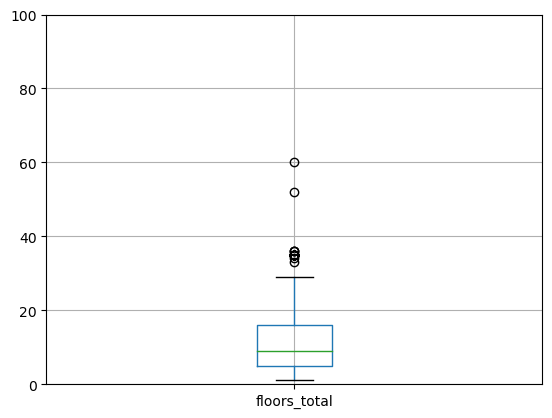

In [36]:
# построим боксплот
data.boxplot('floors_total')
plt.ylim(0, 100)

In [37]:
# удаляем строки с количеством этажей более 30
data = data.query('floors_total < 30 or floors_total.isna()', engine = 'python')

In [38]:
# проверяем удаленные строки
data[data['floors_total'] > 30]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,days_exposition


In [39]:
# присутствует слишком маленькая стоимость квартиры в размере 120 тыс.р. и слишком большая в размере 763 млн.р.
data['last_price'].describe()

count            23531.0
mean      6540189.244826
std      10918476.536349
min              12190.0
25%            3400000.0
50%            4632000.0
75%            6777500.0
max          763000000.0
Name: last_price, dtype: Float64

In [40]:
# одна строка роли не сыграет,предположу, что цена в 120 тыс.р. была указана ошибочно, исправим значение, увеличив его на 100
data[data['last_price'] < 100000] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176,1,805.0,0,NaN,8.0


In [41]:
data['last_price'] = data['last_price'].replace(12190, 12190000)

In [42]:
# квартира дороже 100 млн. руб.
data[data['last_price'] > 100000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,days_exposition
793,20,135000000,310.0,2018-05-22,4,3.30,5,250.00,2,False,False,False,50.00,0,Санкт-Петербург,34159.0,7251,2,295.0,3,190.0,342.0
1026,20,155000000,310.0,2018-10-12,5,5.30,3,190.00,3,False,False,False,63.00,2,Санкт-Петербург,24899.0,4785,0,NaN,1,603.0,NaN
1188,20,118000000,290.6,2018-06-01,6,3.82,6,188.70,3,False,False,False,22.00,1,Санкт-Петербург,25309.0,6224,1,217.0,0,NaN,316.0
1300,14,120000000,280.0,2018-07-12,5,4.70,4,162.00,3,False,False,False,30.00,0,Санкт-Петербург,24680.0,4247,1,464.0,3,339.0,225.0
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.00,5,False,False,False,40.00,0,Санкт-Петербург,23011.0,1197,3,519.0,3,285.0,233.0
1928,11,125000000,224.5,2017-01-24,4,NaN,4,163.50,3,False,False,False,30.00,1,Санкт-Петербург,22805.0,2335,0,NaN,2,497.0,174.0
2243,9,130278280,304.0,2015-07-24,5,3.11,9,NaN,7,False,False,False,NaN,0,Санкт-Петербург,25593.0,5913,2,164.0,0,NaN,599.0
2536,16,159984000,242.4,2015-08-27,4,3.85,9,131.00,7,False,False,False,20.00,0,Санкт-Петербург,21946.0,2242,1,679.0,1,227.0,501.0
3117,19,140000000,631.0,2019-03-30,7,NaN,5,NaN,5,False,False,False,60.00,0,Санкт-Петербург,25707.0,4972,0,NaN,2,210.0,NaN
4996,20,124000000,124.5,2017-10-12,4,3.00,4,67.20,2,False,False,False,20.00,0,Санкт-Петербург,20399.0,1722,3,302.0,3,172.0,45.0


In [43]:
# удалим строки
data = data.loc[data['last_price'] < 100000000] 

In [44]:
data['last_price'].describe()

count           23494.0
mean      6248590.28901
std      6434744.067161
min            430000.0
25%           3400000.0
50%           4600000.0
75%           6750000.0
max          99000000.0
Name: last_price, dtype: Float64

In [45]:
# мы видим, что есть квартиры с кол-вом комнот 0, объекты могут являться, как студиями так и однокомнатной квартирой
#присвои нулевым значения 1-у комнату
data['rooms'].describe()

count    23494.000000
mean         2.066145
std          1.070041
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [46]:
data['rooms'] = data['rooms'].replace(0,1)

In [47]:
#посмотрим кол-во встречающихся значений
data['rooms'].value_counts()

1     8187
2     7878
3     5770
4     1163
5      315
6       99
7       54
8       10
9        8
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64

In [48]:
# удалим строки где комнат больше 8
data = data[data['rooms']<9]

In [49]:
# проверим
data['rooms'].value_counts()

1    8187
2    7878
3    5770
4    1163
5     315
6      99
7      54
8      10
Name: rooms, dtype: int64

In [50]:
# мы видим, что присутствует слишком большая площадь квартиры, которая может повлиять на дальнейшие результаты.
data['total_area'].describe()

count    23476.000000
mean        59.714272
std         32.704450
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        517.000000
Name: total_area, dtype: float64

In [51]:
# удалим строки где площадь квартиры больше 200 квадратных метров
data = data[data['total_area']<200]

In [52]:
# посмотрим результат
data['total_area'].describe()

count    23293.000000
mean        58.085432
std         26.374007
min         12.000000
25%         40.000000
50%         51.700000
75%         68.700000
max        199.200000
Name: total_area, dtype: float64

<font color='green'>**Вывод:**</font>

При предобработке данных были выявлены пропуски в процентном соотношении. Пропуски в столбце "balcony" - число балконов были заполнены значением 0. Также была произведена проверка на аномальные значения, которая показала, что в столбце "ceiling_height" имеются аномальные значения с высотой потолков 25 и 35 м (были исправлены), так же были исправлены анамалии в столбцах total_area, rooms и last_price. Проверка на явные дубликаты показала, что их нет. Но были выявлены неявные дубликаты в столбце "locality_name". Дубликаты в столбце "locality_name" также устранены. В данном разделе в необходимых столбцах были изменены типы данных с float на int.

### Посчитайте и добавьте в таблицу новые столбцы

**3.1. Расчет цены одного квадратного метра**

In [53]:
# рассчитаем цену одного квадратного метра. Затем переводим полученные данные из типа float в int.
data['price_per_square_metr'] = (data['last_price'] / data['total_area']).astype('int')

**3.2. Добавим день недели, месяц и год публикации объявления**

In [54]:
# выведем день недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
# добавляю столбец с месяцем публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month
# добавляю столбец с годом публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

**3.3. Тип этажа квартиры**

In [55]:
# используя функцию добавим новый столбец с типами этажей согласно условию по столбцу 'floor'
def category_floor(row):
    
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

# добавляем столбец тип этажа квартиры
data['category_floor'] = data.apply(category_floor, axis=1)

In [56]:
# проверим
data[['floor', 'floors_total', 'category_floor']].sample(10)

,floor,floors_total,category_floor
2454,2,2,последний
6428,3,9,другой
17323,4,5,другой
2716,1,6,первый
8307,5,5,последний
6721,17,20,другой
6639,11,18,другой
4957,10,24,другой
3991,4,13,другой
16711,6,12,другой


**3.4. Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)**

In [57]:
data['city_centers_nearest_km'] = (data['city_centers_nearest_m']/1000).astype('Int64')

**3.5. Посмотрим все добавленные столбцы**

In [58]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,days_exposition,price_per_square_metr,weekday_exposition,month_exposition,year_exposition,category_floor,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028,1,482.0,2,755.0,NaN,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603,0,NaN,0,NaN,81.0,82920,1,12,2018,первый,18
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933,1,90.0,2,574.0,558.0,92785,3,8,2015,другой,13
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800,2,84.0,3,234.0,424.0,408176,4,7,2015,другой,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098,2,112.0,1,48.0,121.0,100000,1,6,2018,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232,1,796.0,3,381.0,NaN,72490,1,3,2017,другой,4
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,False,False,False,8.50,0,Тосно,NaN,<NA>,0,NaN,0,NaN,45.0,52542,0,1,2018,другой,<NA>
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,False,False,False,NaN,0,село Рождествено,NaN,<NA>,0,NaN,0,NaN,NaN,44091,6,2,2018,первый,<NA>
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364,2,173.0,3,196.0,602.0,149511,1,3,2017,другой,10


### Проведите исследовательский анализ данных

**4.1.1 Изучим общую площадь**

count    23293.000000
mean        58.085432
std         26.374007
min         12.000000
25%         40.000000
50%         51.700000
75%         68.700000
max        199.200000
Name: total_area, dtype: float64

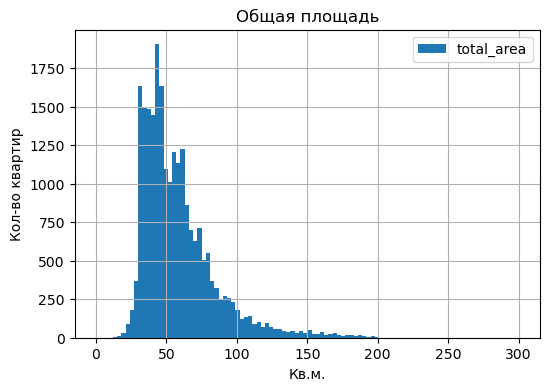

In [59]:
# построим гистограмму по общей площади квартир
data.plot(title = 'Общая площадь', y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (6,4), range = (0,300))
plt.xlabel('Кв.м.')
plt.ylabel('Кол-во квартир')
data['total_area'].describe()

<font color='green'>**Вывод:**</font>

По построенной гистограмме можно заметить, что распределение общей площади нормальное. Общая площадь у большинства квартир находится в диапазоне 40-60 квадратных метров. Общая выборка по площади имеет большой размах, от 12 до 199 квадратных метров. Медианное значение не значительно отличается от среднего, медиана составила 51,7 кв метра, среднее 58 кв метра.

**4.1.2. Изучим жилую площадь**

count    21458.000000
mean        33.221428
std         17.304709
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

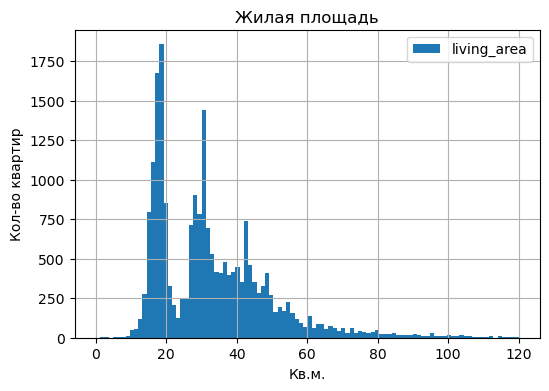

In [60]:
# построим гистограмму
data.plot(title = 'Жилая площадь', y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (6,4), range = (0,120)) 
plt.xlabel('Кв.м.')
plt.ylabel('Кол-во квартир')
data['living_area'].describe()

<font color='green'>**Вывод:**</font>

По построенной гистограмме можно заметить, что распределение жилой площади имеет выбросы. С жилой площадью от 60 квадратных метров квартир незначительное количество. В данных имеются отклонения, так как минимальная жилая площадь не может составлять 2 квадратных метра. Средняя жилая площадь составила 33.2 квадратных метров, что статистически похоже на правду.

**4.1.3. Изучим площадь кухни**

count    21104.000000
mean        10.360244
std          5.323305
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max         93.200000
Name: kitchen_area, dtype: float64

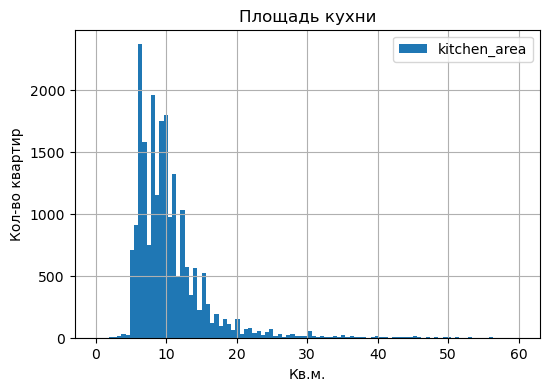

In [61]:
# построим гистограмму
data.plot(title = 'Площадь кухни', y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (6,4), range = (0,60)) 
plt.xlabel('Кв.м.')
plt.ylabel('Кол-во квартир')
data['kitchen_area'].describe()

<font color='green'>**Вывод:**</font>

Площадь кухни находится в диапазоне от 1,3 квадратных метра до 93,2 квадратных метров. В данных имеются выбросы, минимальное значение площади не является реалистичным. Медианное значение составляет кухня с площадью 9 квадратный метр. Кухни с площадью от 30 квадратных метров не репрезентативны для анализа, т.к. доля таких квартир, очень маленькая среди предоставленных данных.

**4.1.4. Цена объекта**

count           23293.0
mean     5971310.081999
std      5340807.982924
min            430000.0
25%           3400000.0
50%           4600000.0
75%           6690000.0
max          98000000.0
Name: last_price, dtype: Float64

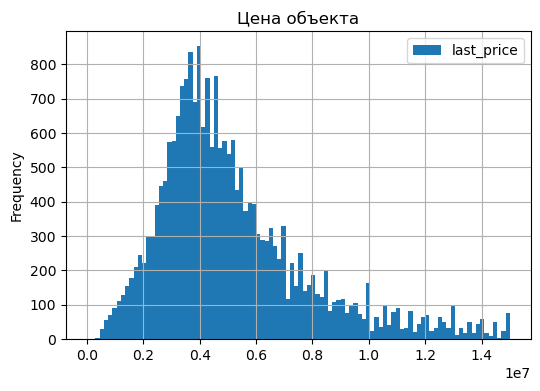

In [62]:
# построим гистограмму
data.plot(title = 'Цена объекта', y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (6,4), range = (0,15000000)) 
data['last_price'].describe()

<font color='green'>**Вывод:**</font>

Цены на недвижимость находятся в диапазоне от 430 тыс.руб. до 98 млн руб. Средняя стоимость квартиры составила 5,9 млн руб., медианное значение 4,6 млн.руб.

**4.1.5. Количество комнат**

count    23293.000000
mean         2.041729
std          0.979075
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

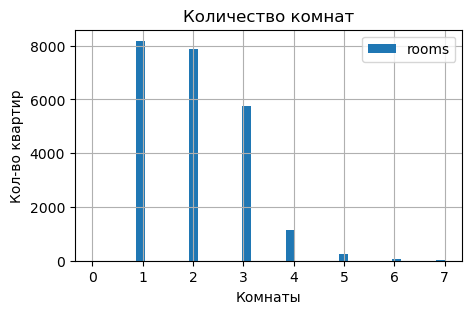

In [63]:
# построим гистограмму
data.plot(title = 'Количество комнат', y = 'rooms', kind = 'hist', bins = 40, grid=True, figsize = (5,3), range = (0,7)) 
plt.xlabel('Комнаты')
plt.ylabel('Кол-во квартир')
data['rooms'].describe()

<font color='green'>**Вывод:**</font>

Больше всего двухкомнатных и однокомнатных квартир, что является реалистичным.

**4.1.6. Высота потолков**

count    14309.000000
mean         2.721925
std          0.306750
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

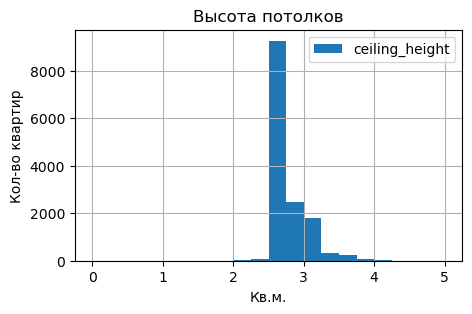

In [64]:
# построим гистограмму
data.plot(title = 'Высота потолков', y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,5)) 
plt.xlabel('Кв.м.')
plt.ylabel('Кол-во квартир')
data['ceiling_height'].describe()

<font color='green'>**Вывод:**</font>

Высота потолков в среднем составляет 2,72 м, медиана 2,65 м. Минимальная высота потолка составила 2 м, что является реялистичной.

**4.1.7. Этаж квартиры**

count    23293.000000
mean         5.873181
std          4.852944
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

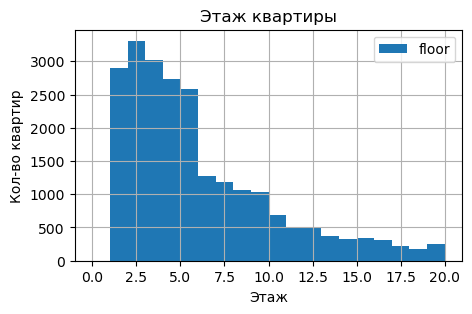

In [65]:
# построим гистограмму
data.plot(title = 'Этаж квартиры', y = 'floor', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,20)) 
plt.xlabel('Этаж')
plt.ylabel('Кол-во квартир')
data['floor'].describe()

<font color='green'>**Вывод:**</font>

Максимальное количество квартир находится примерно до 6 этажа включительно. Разброс по этажам с 1-33.

**4.1.8. Тип этажа квартиры («первый», «последний», «другой»)**

<Axes: >

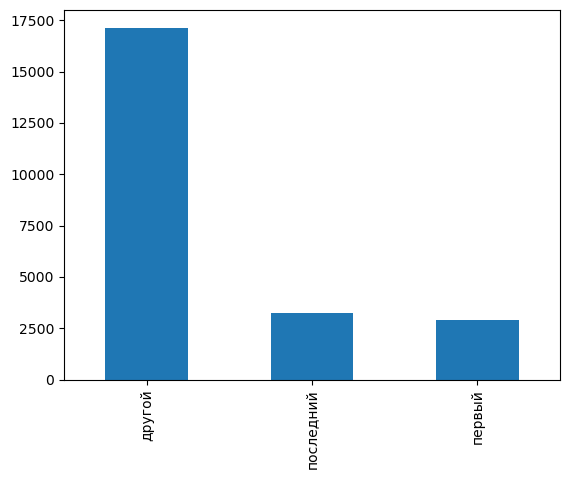

In [66]:
# построим барплот
data['category_floor'].value_counts().plot.bar()

<font color='green'>**Вывод:**</font>

Максимальное количество квартир с типом не "первый" этаж и не "последний", а "другой". Количество квартир на первых этажах и на последних отличается незначительно.

**4.1.9. Общее количество этажей в доме**

<Axes: title={'center': 'Общее количество этажей в доме'}, ylabel='Frequency'>

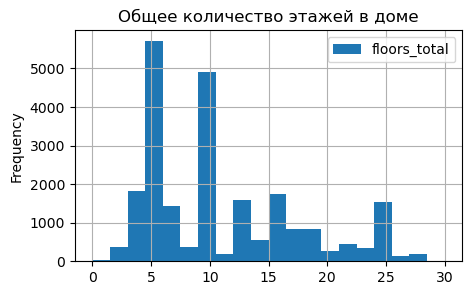

In [67]:
# построим гистограмму
data.plot(title = 'Общее количество этажей в доме', y = 'floors_total', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,30)) 

<font color='green'>**Вывод:**</font>

Максимальное количество квартир в пятиэтажных домах, так же не далеко отстали десятиэтажные дома. Квартир в домах с этажностью от 20 и более несущественное количество.

**4.1.10. Расстояние до центра города в метрах**

count         17797.0
mean     14274.466595
std       8596.837477
min             181.0
25%            9425.0
50%           13149.0
75%           16293.0
max           65968.0
Name: city_centers_nearest_m, dtype: Float64

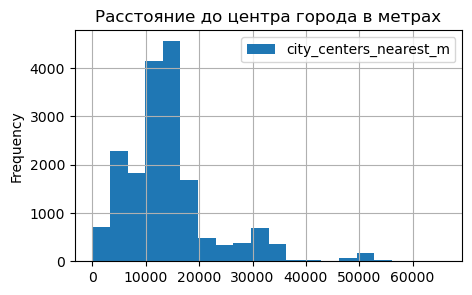

In [68]:
# построим гистограмму
data.plot(title = 'Расстояние до центра города в метрах', y = 'city_centers_nearest_m', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,66000)) 
data['city_centers_nearest_m'].describe()

<font color='green'>**Вывод:**</font>

Среднее расстояние до центра города составляет 14286,3 м. Наибольшее количество объявлений о продаже квартир находится по расстоянию до центра города в диапазоне от 10 000 до 15 000 м.

**4.1.11. Расстояние до ближайшего аэропорта**

count    17777.000000
mean     28841.593407
std      12683.043839
min          0.000000
25%      18490.000000
50%      26876.000000
75%      37368.000000
max      84869.000000
Name: airports_nearest_m, dtype: float64

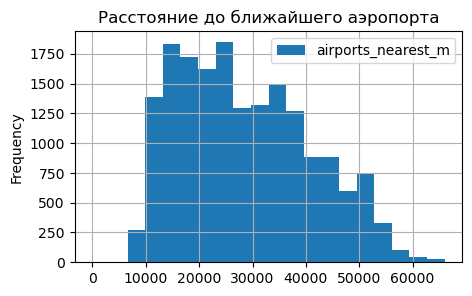

In [69]:
# построим гистограмму
data.plot(title = 'Расстояние до ближайшего аэропорта', y = 'airports_nearest_m', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,66000)) 
data['airports_nearest_m'].describe()

<font color='green'>**Вывод:**</font>

Среднее расстояние до ближайшего аэропорта составляет 28826.8 м. Наибольшее количество объявлений о продаже квартир находится по расстоянию до ближайшего аэропорта в диапазоне от 24 000 до 26 000 м.

**4.1.12. Расстояние до ближайшего парка**

count    7867.000000
mean      491.810601
std       342.507546
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest_m, dtype: float64

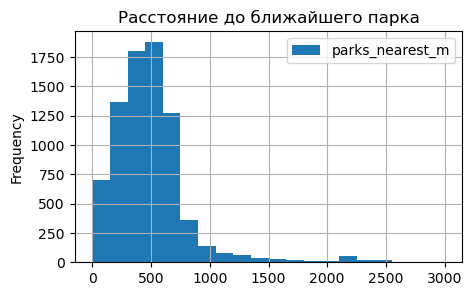

In [70]:
# построим гистограмму
data.plot(title = 'Расстояние до ближайшего парка', y = 'parks_nearest_m', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,3000)) 
data['parks_nearest_m'].describe()

<font color='green'>**Вывод:**</font>

Среднее расстояние до ближайшего парка составляет 491,8 метров. При удаленности квартир от 800 метров и больше, выявлено незначительное количество размещенных объявлений.

**4.1.13. День и месяц публикации объявления**

count    23293.000000
mean         6.402353
std          3.492547
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

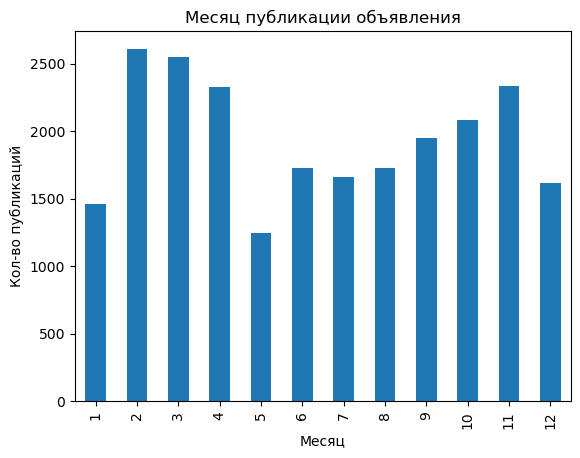

In [71]:
#data.plot(title = 'Месяц публикации объявления', y = 'month_exposition', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (1,12)) 
data['month_exposition'].value_counts().sort_index().plot.bar()

plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Кол-во публикаций');

data['month_exposition'].describe()

count    20184.000000
mean       179.527150
std        218.360366
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

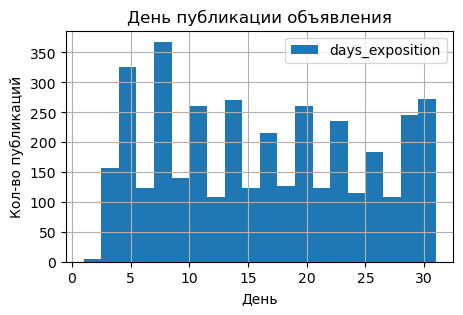

In [74]:
# построим гистограмму
data.plot(title = 'День публикации объявления', y = 'days_exposition', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (1,31)) 
plt.xlabel('День')
plt.ylabel('Кол-во публикаций')
data['days_exposition'].describe()

<font color='green'>**Вывод:**</font>

По построенным гистограммам можно сделать следующий вывод: наибольшее количество объявлений в среднем было размещено в феврале-марте-апреле. В летний период наблюдается спад, скорее всего связанный с большим количеством отпусков и отсутствием части людей в городах. Затем в осенне - зимний период (до ноября включительно) наблюдается рост публикаций объявлений о продаже квартир. В предновогодний период (декабрь) наблюдается спад по публикациям объявлений.

**4.2. Исследование количества дней для продажи квартиры**

count    20184.000000
mean       179.527150
std        218.360366
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

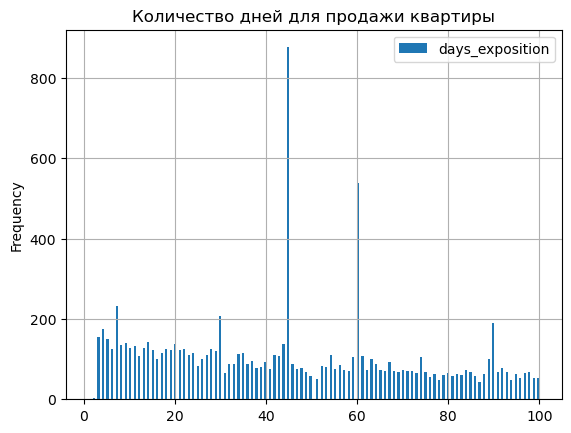

In [75]:
# построим гистограмму
data.plot(title = 'Количество дней для продажи квартиры', y = 'days_exposition', kind = 'hist', bins = 200, grid=True, range = (1,100)) 
data['days_exposition'].describe()

<font color='green'>**Вывод:**</font>

Построив гистограмму со значениями до 200 и с количеством корзин 200, выявились аномалии. Согласно графику, выбивающиеся значения примерно на 7, 32, 45, 60 и 90 днях. Именно эти дни являются самыми популярными в количестве дней до снятия объявления.

count    20184.000000
mean       179.527150
std        218.360366
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

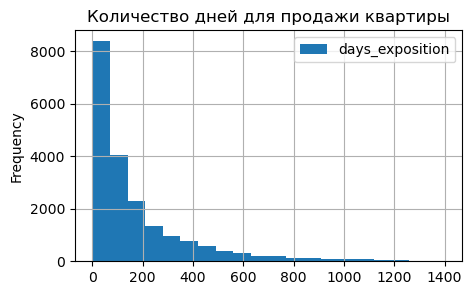

In [76]:
# построим гистограмму
data.plot(title = 'Количество дней для продажи квартиры', y = 'days_exposition', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (1,1400)) 
data['days_exposition'].describe()

(0.0, 1700.0)

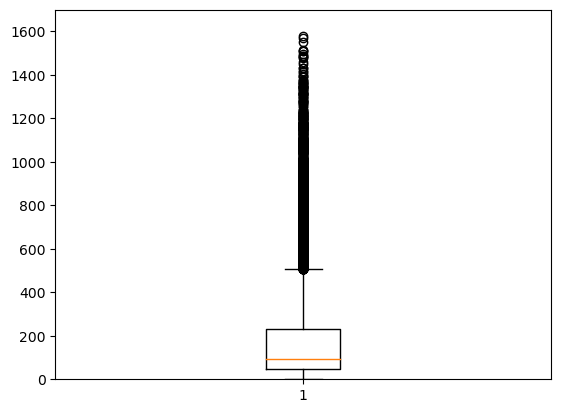

In [77]:
# построим ящик с усами
plt.boxplot(data['days_exposition'].dropna())
plt.ylim(0, 1700)

<font color='green'>**Вывод:**</font>

Среднее значение продажи квартиры 179 дней. Медианное значение - 95 дней. Быстрыми продажи можно считать до 25% квартиль (то есть до 45 дней). Самыми долгими можно считать продажи от 75% квартиль (то есть от 229 дней до 1580 дней). Получено распределение Пуассона.

**4.3. Исследование факторов, влияющих на полную стоимость квартиры**

In [80]:
print(len(data))

data[['last_price', 'total_area','rooms']].describe().loc[['min', 'max']]

23293


,last_price,total_area,rooms
min,430000.0,12.0,1.0
max,98000000.0,199.2,8.0


**4.3.1. Исследование зависимости общей площади от цены**

Корреляция: 0.7323941200015645


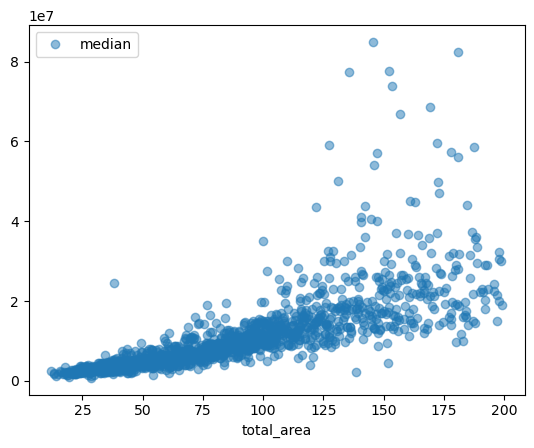

In [81]:
# строим сводную таблицу с применением агрегирующих функций
data['last_price'] = data['last_price'].astype('float')
pivot_table_total_area = data.pivot_table(index='total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# убираем задвоенные названия столбцов
pivot_table_total_area.columns=['mean', 'count', 'median'] 
pivot_table_total_area.plot(y='median', style = 'o', alpha =0.5)
print('Корреляция:',data['total_area'].corr(data['last_price']))

<font color='green'>**Вывод:**</font>

Зависимость полной стоимости квартиры от общей площади имеется. Коэффициент корреляции Пирсона = 0,73. Так как с ростом первой величины растет и вторая, то корреляция положительная. Чем ближе коэффициент корреляции к 1, тем теснее линейная взаимосвязь.

**4.3.2. Исследование зависимости жилой площади от цены**

Корреляция: 0.6183893714593192


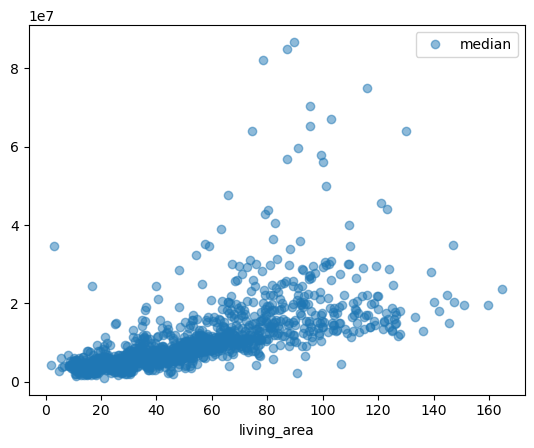

In [83]:
# строим сводную таблицу с применением агрегирующих функций
pivot_living_area = data.pivot_table(index='living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# убираем задвоенные названия столбцов
pivot_living_area.columns=['mean', 'count', 'median']
pivot_living_area.plot(y='median', style = 'o', alpha =0.5)
print('Корреляция:',data['living_area'].corr(data['last_price']))

<font color='green'>**Вывод:**</font>

Зависимость полной стоимости квартиры от жилой площади имеется. Коэффициент корреляции Пирсона = 0,61. Так как с ростом первой величины растет и вторая, то корреляция положительная. Чем ближе коэффициент корреляции к 1, тем теснее линейная взаимосвязь.

**4.3.3. Исследование зависимости площади кухни от цены**

Корреляция: 0.5693131653781531


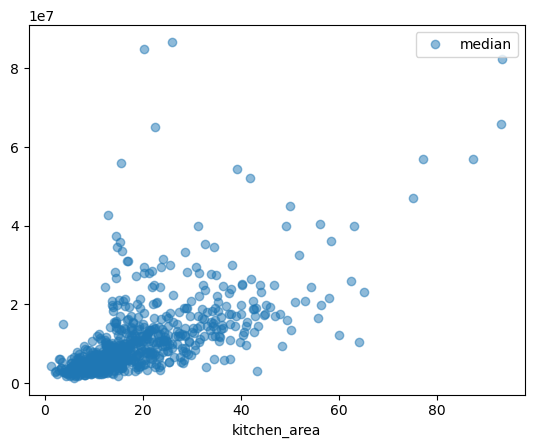

In [84]:
# строим сводную таблицу с применением агрегирующих функций
pivot_kitchen_area = data.pivot_table(index='kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median']) 
# убираем задвоенные названия столбцов
pivot_kitchen_area.columns=['mean', 'count', 'median']
pivot_kitchen_area.plot(y='median', style = 'o', alpha =0.5)
print('Корреляция:',data['kitchen_area'].corr(data['last_price']))

<font color='green'>**Вывод:**</font>

Зависимость общей площади квартиры от цены самая сильная (коэффициент корреляции 0,73), зависимость площади кухни от цены слабее (коэффициент корреляции 0,56).

**4.3.4. Исследование зависимости количества комнат от цены**

,mean,count,median
rooms,,,
1,3.808318e+06,8185,3585000.0
2,5.549744e+06,7878,4750000.0
3,7.944044e+06,5756,6195000.0
4,1.159802e+07,1128,8862500.0
5,1.507834e+07,263,12500000.0
6,1.658603e+07,61,13500000.0
7,1.868200e+07,20,16750000.0
8,1.914500e+07,2,19145000.0


0.4348088819728902

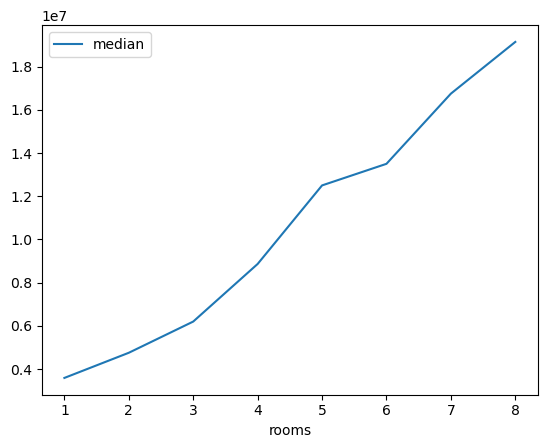

In [85]:
# Делаем сводную таблицу с зависимостью стоимость/количество комнат
pivot_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Переименовываем столбцы в сводной таблице
pivot_rooms.columns = ['mean', 'count', 'median'] 
# Изучаем данные
display(pivot_rooms)
# Строим график
pivot_rooms.query('rooms').plot(y = 'median')
# Считаем коэффициент корреляции Пирсона
data['rooms'].corr(data['last_price'])

<font color='green'>**Вывод:**</font>

Зависимость количества комнат от цены высокая. Цены на квартиры растут, чем больше комнат, тем больше цена, все логично. Коэффициент корреляции Пирсона равен 0,43.

**4.3.5. Исследование зависимости этажа, на котором расположена квартира от цены**

,mean,median
category_floor,,
другой,6.253625e+06,4800000.0
первый,4.593917e+06,3900000.0
последний,5.708150e+06,4250000.0


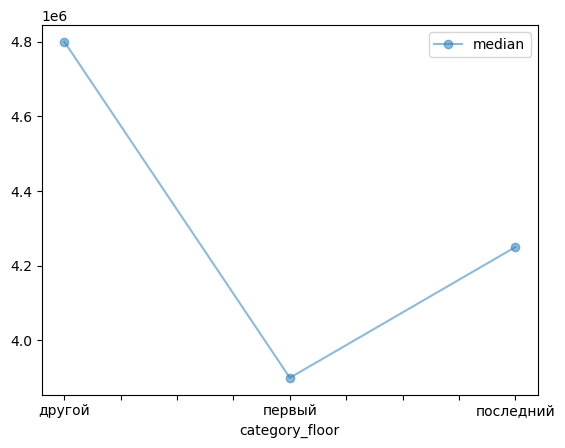

In [93]:
# построим сводную таблицу
pivot_category_floor = data.pivot_table(index = 'category_floor', values = 'last_price', aggfunc = ['mean', 'median'])
pivot_category_floor.columns = ['mean', 'median']
display(pivot_category_floor)
pivot_category_floor.plot(y='median', style = 'o-', alpha =0.5);

<font color='green'>**Вывод:**</font>

В завивисимости от этажа, на котором расположена квартира, цена на неё меняется. Так, на первом этаже в среднем стоимость квартиры самая низкая, составляет 4,59. На последнем этаже квартиры стоят дороже - 5,7. На "другом" этаже стоимость 6,2. По сводной таблице можно сделать вывод, что зависимость имеется.

**4.3.6. Исследование зависимости даты размещения объявления (день недели) от цены**

,mean,count,median
weekday_exposition,,,
1,5.985342e+06,4129,4700000.0
2,5.971527e+06,3893,4650000.0
0,6.018995e+06,3561,4600000.0
3,6.177016e+06,4213,4600000.0
4,5.845477e+06,3934,4540000.0
5,5.857963e+06,1898,4500000.0
6,5.740037e+06,1665,4500000.0


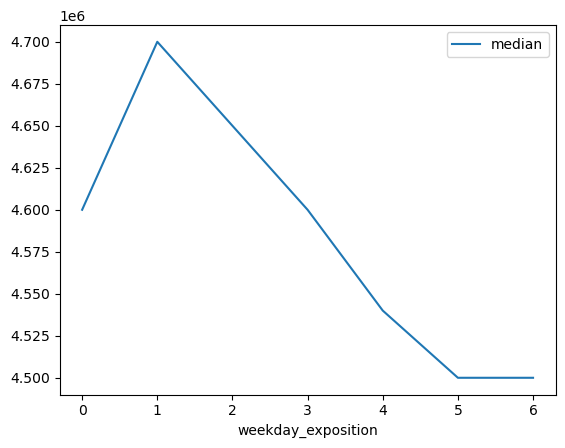

In [87]:
# построим сводную таблицу
pivot_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_weekday_exposition.plot(y = 'median')

pivot_weekday_exposition.sort_values('median', ascending = False)

<font color='green'>**Вывод:**</font>

Согласно построенному графику и сводной таблице можно сделать следующие выводы:
1. Cамая низкая стоимость на квартиры зафиксирована в субботу и воскресенье.
2. Cамая высокая стоимость на квартиры зафиксирована во вторник.

То есть заметна тенденция, в начале недели квартиры стоят, как правило, дороже, к выходным снижение стоимости наблюдается.

**4.3.7. Исследование зависимости даты размещения объявления (месяц) от цены**

,mean,count,median
month_exposition,,,
4,5.915327e+06,2326,4757967.5
9,6.074389e+06,1947,4670000.0
11,6.085346e+06,2335,4650000.0
12,6.211824e+06,1618,4650000.0
2,6.032030e+06,2610,4630000.0
3,5.815908e+06,2547,4600000.0
7,5.973564e+06,1664,4600000.0
1,5.992413e+06,1464,4590000.0
8,6.027224e+06,1724,4550000.0


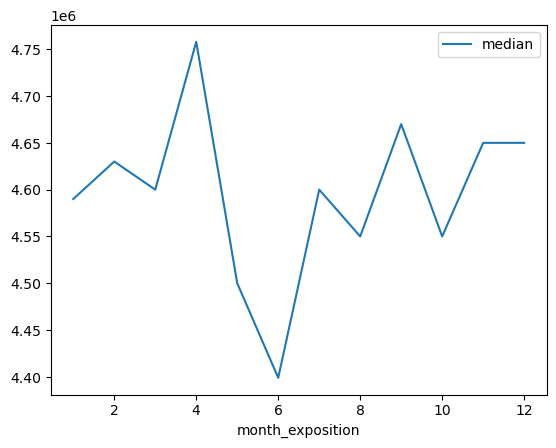

In [88]:
# построим сводную таблицу
pivot_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_month_exposition.columns = ['mean', 'count', 'median']
pivot_month_exposition.plot(y = 'median')

pivot_month_exposition.sort_values('median', ascending = False)

<font color='green'>**Вывод:**</font>

Согласно построенному графику и сводной таблице можно сделать следующие выводы:
1. Cамая низкая стоимость на квартиры зафиксирована в июне.
2. Cамая высокая стоимость на квартиры зафиксирована в апреле.

Как правило, на практике, стоимость квартир ближе к осени всегда увеличивается, как и количество объявлений на рынке недвижимости. Так же мы видим, что летом цена падает.

**4.3.8. Исследование зависимости даты размещения объявления (год) от цены**

,mean,count,median
year_exposition,,,
2014,1.090976e+07,133,7500000.0
2015,7.311834e+06,1134,5215000.0
2019,6.321436e+06,2840,5000000.0
2018,5.640084e+06,8417,4550000.0
2016,6.098194e+06,2710,4500000.0
2017,5.881069e+06,8059,4500000.0


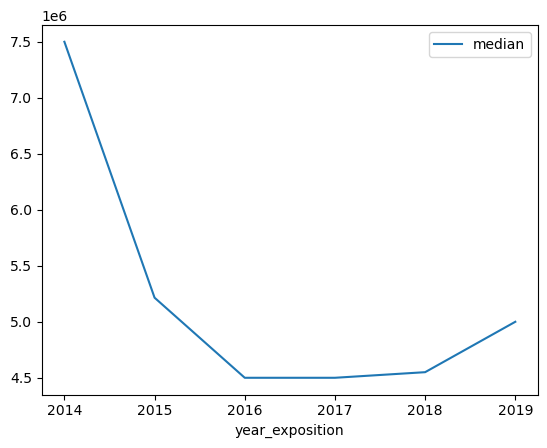

In [89]:
# построим сводную таблицу
pivot_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_year_exposition.columns = ['mean', 'count', 'median']
pivot_year_exposition.plot(y = 'median')

pivot_year_exposition.sort_values('median', ascending = False)

<font color='green'>**Вывод:**</font>

Согласно построенному графику и сводной таблице можно сделать следующие выводы:
1. Cамая низкая стоимость на квартиры зафиксирована в 2017 и 2016 году.
2. Cамая высокая стоимость на квартиры зафиксирована в среднем в 2014 году.

**4.4. Анализ десяти населенных пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра**

In [90]:
# Делаем сводную таблицу с зависимостью название населенного пункта /цена одного квадратного метра
pivot_locality_name = data.pivot_table(index='locality_name', values='price_per_square_metr' , aggfunc=['count', 'median'])
# Переименовываем столбцы и избавляемся от двойных названий столбцов
pivot_locality_name.columns = ['count', 'median']
# Сортируем сводную таблицу по количеству объявлений
pivot_locality_name = pivot_locality_name.sort_values('count', ascending = False).head(10)
display(pivot_locality_name)

,count,median
locality_name,,
Санкт-Петербург,15396,104625.5
поселок Мурино,586,86249.5
Кудрово,470,95555.0
поселок Шушары,439,76829.0
Всеволожск,398,65789.0
Пушкин,364,99993.5
Колпино,337,74722.0
поселок Парголово,326,91779.5
Гатчина,307,67796.0


<font color='green'>**Вывод:**</font>

Согласно построенной сводной таблице можно сделать следующие выводы:
1. Cамая низкая стоимость квадратного метра из 10 населенных пунктов с самым большим количеством объявлений зафиксирована в городе Выборг.
2. Cамая высокая стоимость квадратного метра из 10 населённых пунктов с самым большим количеством объявлений зафиксирована в городе Санкт-Петербург.

**4.5. Анализ изменения общей стоимости квартир в Санкт-Петербурге для каждого километра по степени удаленности от центра**

In [97]:
km_pivot = data.query('locality_name == "Санкт-Петербург"')\
.pivot_table(index = 'city_centers_nearest_km', values = 'last_price', aggfunc = 'median')
display(km_pivot)

,last_price
city_centers_nearest_km,
0,11295000.0
1,10000000.0
2,9270000.0
3,8389000.0
4,9500000.0
5,8560000.0
6,7900000.0
7,7400000.0
8,6500000.0


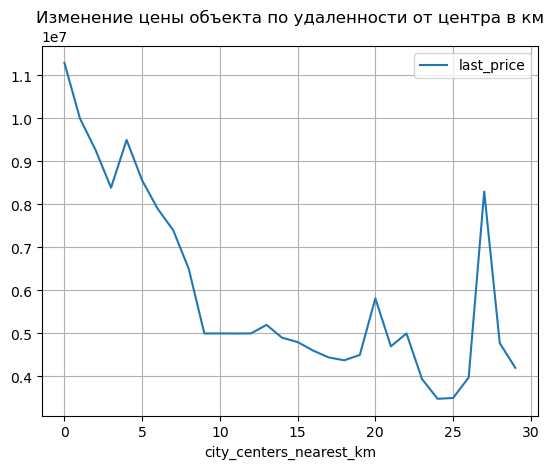

In [96]:
km_pivot.plot(grid = True, title = 'Изменение цены объекта по удаленности от центра в км');

<font color='green'>**Вывод:**</font>

Согласно построенной сводной таблице и графику можно сделать следующие выводы:
Чем дальше квартира в Санкт-Петербурге расположена от центра, тем дешевле ее стоимость. Так, при удаленности от центра на 29 км стоимость одной квартиры в среднем составила 4200000.0. Тогда как, стоимость квартиры при удаленности от центра в среднем на 1 км составила 10000000.0 что почти в 2,5 раза дороже. Самые дорогие квартиры находятся в двух-четырех километрах от центра (данный вывод основан на построенном графике).

### Общий вывод

Предобработка данных:

В ходе проведенного исследования был изучен весь датафрейм, выявлены пропуски, которые затем заполнили, по возможности, необходимыми данными. Также была проведена проверка на типы данных в каждом столбце.
При предобработке данных были выявлены неявные дубликаты в столбце с названиями пунктов населения. При исследовании были выявлены аномальные значения в различных столбцах, такие как, квартиры с нулевым количеством комнат, данные с незаполненным количеством балконов (такие данные были заполнены нулевыми значениями), проданные квартиры за 0 дней с даты размещения объявления, высота потолков 25 м и 32м и другие.
Исходный датафрейм был дополнен новыми расчетами, добавлены столбцы с ценой одного квадратного метра, с днем недели, годом и месяцем публикации и другие.

Исследовательский анализ данных показал:

1. Медиана общей площади составила 51,7 кв метра.
2. Медиана жилой площади составила 30 кв метра.
3. Медианное значение площади кухни составила 9 кв метра.
4. Больше всего двухкомнатных и однокомнатных квартир.
5. Медиана высоты потолков составила 2,65 м.
6. Максимальное количество квартир с типом 'Другой'
7. На общую стоимость квартиры больше всего влияют количество комнат, близость по расстоянию от центра города, а также этаж квартиры. Соответственно, чем ближе квартира расположена к центру города (в радиусе от 2-4 км, тем стоимость квартиры выше), чем выше этаж, на котором размещается квартира, тем дороже квартира (самые дешевые квартиры в среднем расположены на первых этажах).
8. Cамая низкая стоимость на квартиры зафиксирована в 2017 и 2016 году. Cамая высокая стоимость на квартиры зафиксирована в  2014 году. Медианное значение стоимости квартиры составило 4,6 млн.руб.
9. Cамая низкая стоимость на квартиры зафиксирована в июне. Тогда как рост стоимости наблюдается в осенний период.
10. Анализ десяти населенных пунктов с наибольшим числом объявлений показал, что самая высокая стоимость квадратного метра из 10 населённых пунктов зафиксирована в городе Санкт-Петербург, самая низкая в Выборге.
11. Анализ изменения общей стоимости квартиры в Санкт-Петербурге для каждого километра по степени удаленности от центра, показал, чем дальше квартира в Санкт-Петербурге расположена от центра, тем дешевле ее стоимость. Так, при удаленности от центра на 29 км стоимость одной квартиры составила 4200000.0.